In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cars-dataset/cars.csv
/kaggle/input/customer/customer.csv


# Ordinal Encoder and Label Encoder

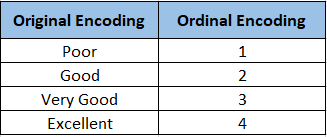

<br>Label encoder is same as Ordinal, just it is used for Target Variable
<br>Catergorical Data is *object type* , we convert it into number before training the model
<br>Before you do Ordinal or Label Encoding, you should have X_train, X_valid/test, y_train, y_valid/test

# Lets start coding


In [2]:
df = pd.read_csv("/kaggle/input/customer/customer.csv")
df.head()

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No


In [3]:
from sklearn.model_selection import train_test_split
X = df.drop(['purchased'],axis=1)
y = df.purchased
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<h4>Ordinal Encoder</h4>

In [4]:
from sklearn.preprocessing import OrdinalEncoder

X_train_encoded = X_train.copy()
X_valid_encoded = X_valid.copy()

ordinal_cols = ['review','education']

oe = OrdinalEncoder(categories=[['Poor','Average','Good'],['School','UG','PG']])
X_train_encoded[ordinal_cols] = oe.fit_transform(X_train[ordinal_cols])
X_valid_encoded[ordinal_cols] = oe.transform(X_valid[ordinal_cols])

<h4>Label Encoder</h4>

In [5]:
from sklearn.preprocessing import LabelEncoder

y_train_encoded = y_train.copy()
y_valid_encoded = y_valid.copy()

le=LabelEncoder() #cannot decide order here, it will be randomly assigned

y_train_encoded = le.fit_transform(y_train)
y_valid_encoded = le.transform(y_valid)

y_train_encoded= pd.DataFrame(y_train_encoded, columns=['purchased'])
y_valid_encoded = pd.DataFrame(y_valid_encoded, columns=['purchased'])

<h4>Result</h4>

In [6]:
print("\nX_train \n", X_train.head(5))
print("\nX_train_encoded \n", X_train_encoded.head(5))
print("\nX_valid \n", X_valid.head(5))
print("\nX_valid_encoded \n", X_valid_encoded.head(5))
print("\ny_train \n", y_train.head(5))
print("\ny_train_encoded \n", y_train_encoded.head(5))
print("\ny_valid \n", y_valid.head(5))
print("\ny_valid_encoded \n", y_valid_encoded.head(5))


X_train 
     age  gender   review education
2    70  Female     Good        PG
14   15    Male     Poor        PG
42   30  Female     Good        PG
29   83  Female  Average        UG
4    16  Female  Average        UG

X_train_encoded 
     age  gender  review  education
2    70  Female     2.0        2.0
14   15    Male     0.0        2.0
42   30  Female     2.0        2.0
29   83  Female     1.0        1.0
4    16  Female     1.0        1.0

X_valid 
     age  gender   review education
48   39  Female     Good        UG
3    72  Female     Good        PG
5    31  Female  Average    School
11   74    Male     Good        UG
0    30  Female  Average    School

X_valid_encoded 
     age  gender  review  education
48   39  Female     2.0        1.0
3    72  Female     2.0        2.0
5    31  Female     1.0        0.0
11   74    Male     2.0        1.0
0    30  Female     1.0        0.0

y_train 
 2      No
14    Yes
42    Yes
29    Yes
4      No
Name: purchased, dtype: object

y_train